# Import Library

In [1]:
import pandas as pd 
import numpy as ny 
import matplotlib.pyplot as plot 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

# Data Preparation

In [2]:
data = pd.read_csv(r"C:\Users\Finny\Desktop\bpnn wity python-20210119T140404Z-001\nn_dataset.csv")

data.head()

,Nscore,Cscore,Impulsive,Amphet,Benzos,Caff,Cannabis,Coke,Ecstasy,LSD,Nicotine,CONSUMP_SCORE
0,0.910287,0.134551,0.215401,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0
1,0.666125,0.574918,0.565343,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
2,0.305900,0.740399,0.428474,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
3,0.666125,0.633946,0.428474,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
4,0.615238,0.353297,0.428474,0.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0


In [3]:
#data.info()
#data.describe()

# Split Ratio 

In [4]:
x = data.drop("CONSUMP_SCORE", axis=1).values
y = data[["CONSUMP_SCORE"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) #test_size= 0.1,0.3 

# Parameters

In [5]:
lr = 0.1      #1.0, 0.5, 0.1, 0.01
ep = 5000        #1000, 5000, 10000
N = y_train.size

n_input = 11 
n_hidden = 6 
n_deep = 4
n_output = 1

In [6]:
x_train.shape

(813, 11)

# Functions

In [7]:
def sigmoid(x):
    return 1 / (1 + ny.exp(-x))

def mean_square_error(predict, actual):
    N = actual.size
    mse = (ny.square(predict - actual)).sum()/(2*N)
    return mse

def root_mean_square_error(predict, actual):
    N = actual.size
    rmse = ny.sqrt((ny.square(predict - actual)).sum()/(2*N))
    return rmse

def accuracy(predict, actual):
    correct_prediction = predict.round() == actual 
    acc = correct_prediction.mean()
    return acc

# Initial Weight  

In [8]:
ny.random.seed(10)

w1 = ny.random.normal(scale=0.5, size=(n_input,n_hidden))   #(11,6)
w2 = ny.random.normal(scale=0.5, size=(n_hidden,n_deep))    #(6,4)
w3 = ny.random.normal(scale=0.5, size=(n_deep,n_output))    #(4,1)

# BPNN

In [9]:
monitor = {"mean_square_error": [], "root_mean_square_error": [], "accuracy": []}
N = y_train.size

for epoch in range(ep):
    
    #feedforward 
    hidden_layer = sigmoid(ny.dot(x_train, w1))      
    deep_layer = sigmoid(ny.dot(hidden_layer, w2))
    output_layer = sigmoid(ny.dot(deep_layer,w3))  
    
    #monitor 
    mse = mean_square_error(output_layer, y_train)
    rmse = root_mean_square_error(output_layer,y_train)
    acc = accuracy(output_layer,y_train)
    monitor["mean_square_error"].append(mse)
    monitor["root_mean_square_error"].append(rmse)
    monitor["accuracy"].append(acc)
    
    #backpropagate
    output_delta = (output_layer - y_train) * output_layer * (1 - output_layer)    
    deep_delta = ny.dot(output_delta, w3.T) * deep_layer * (1 - deep_layer)
    hidden_delta = ny.dot(deep_delta, w2.T) * hidden_layer * (1 - hidden_layer)  
    
    #updated weights
    w3 -= lr * ny.dot(deep_layer.T, output_delta)/N
    w2 -= lr * ny.dot(hidden_layer.T, deep_delta)/N
    w1 -= lr * ny.dot(x_train.T, hidden_delta)/N
    
monitor_data = pd.DataFrame(monitor)

# Graphs

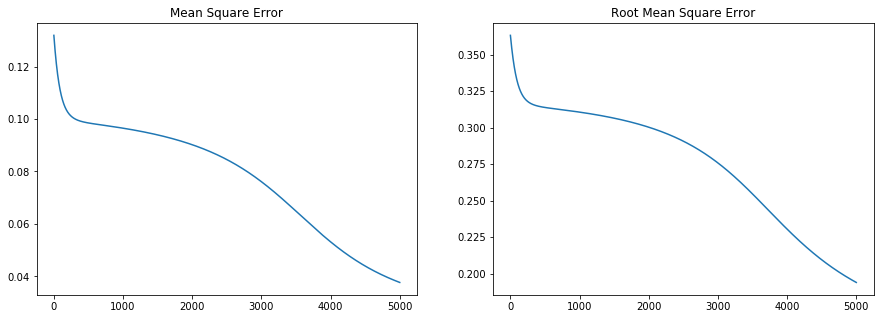

In [10]:
fig, axes = plot.subplots(1, 2, figsize=(15, 5))

monitor_data.mean_square_error.plot(ax=axes[0], title="Mean Square Error")
monitor_data.root_mean_square_error.plot(ax=axes[1], title="Root Mean Square Error")

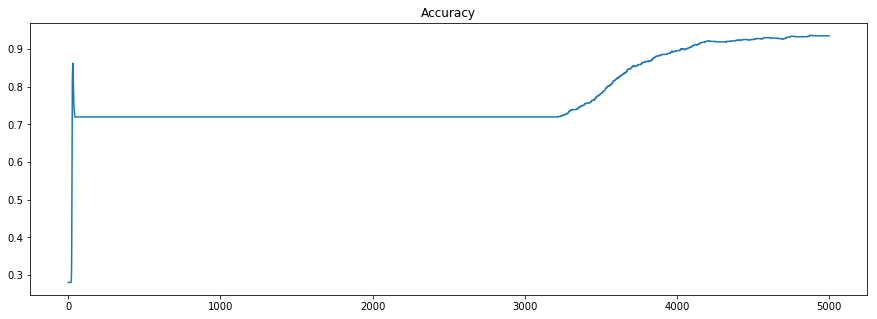

In [11]:
fig, axes = plot.subplots(figsize=(15, 5))

monitor_data.accuracy.plot(title="Accuracy")

# Data Testing 

In [12]:
#feedforward 
hidden_layer = sigmoid(ny.dot(x_test, w1))        
deep_layer = sigmoid(ny.dot(hidden_layer, w2))   
output_layer = sigmoid(ny.dot(deep_layer, w3))  

# Final Weights For First Layer 

In [13]:
w1

array([[ 0.5081601 ,  0.46700409, -0.78918046,  0.49644622,  0.23049246,
        -0.56198566],
       [-0.13275181,  0.29241186, -0.07751393,  0.68549512,  0.08298528,
         0.24585747],
       [-0.52793295,  0.51863437,  0.14338519,  0.45485075, -0.59291262,
        -0.01237768],
       [ 1.02675878, -0.86556885, -0.80026715, -1.50083458,  0.26843533,
         1.50701975],
       [ 0.78756876,  0.51895235,  0.20455549,  0.04389015, -0.0186118 ,
         0.60117208],
       [-0.39605364, -0.07602311,  0.04243013,  0.64864905,  0.50965433,
        -0.26583149],
       [ 0.59592424, -0.63661917,  0.85120681, -1.20729306,  0.53748629,
         0.31963817],
       [-0.1814907 , -0.53430043, -0.24203091, -0.70310887, -0.04454277,
         0.47348548],
       [ 0.70965643, -0.54276434,  0.21291795, -0.83211054, -0.06607538,
         0.87467532],
       [ 0.6395893 , -0.16563396,  1.30814615, -0.09440091,  0.06103272,
         0.11524045],
       [ 0.17047033, -0.57926867,  0.73194661, -0.

# Final Weights For Second Layer  

In [14]:
w2

array([[ 1.14511982, -0.73720403, -0.77406799, -0.60650563],
       [-0.20566735,  0.29101278,  0.51765335,  1.45451003],
       [ 0.56913391,  1.21666404, -1.07997947,  0.06068092],
       [-1.17008836, -0.32529204,  1.97261165,  2.26222147],
       [-0.70006083, -0.07244888, -0.06630286, -0.8605964 ],
       [ 0.58736584,  0.18855227, -0.4577829 , -1.49481848]])

# Final Weights For Third Layer 

In [15]:
w3

array([[ 1.97474127],
       [ 0.43632088],
       [-1.98715082],
       [-2.76442711]])

# Confusion Matrix 

In [16]:
actual = y_test
predict = output_layer.round()


matrix = confusion_matrix(actual, predict, labels=[1,0])
tn, fp, fn, tp = confusion_matrix(actual, predict, labels=[1,0]).reshape(-1)
class_report = classification_report(actual, predict, labels=[1,0])

print('Confusion Matrix: ','\n', matrix, '\n')
print('Values of Outcome: ', '\n', tn, fp, fn, tp, '\n')
print('Classification Report: ', '\n', class_report)

Confusion Matrix:  
 [[ 82  12]
 [ 11 244]] 

Values of Outcome:  
 82 12 11 244 

Classification Report:  
               precision    recall  f1-score   support

           1       0.88      0.87      0.88        94
           0       0.95      0.96      0.95       255

   micro avg       0.93      0.93      0.93       349
   macro avg       0.92      0.91      0.92       349
weighted avg       0.93      0.93      0.93       349



# MSE, RMSE and Accuracy Testing

In [17]:
acc_test = accuracy(output_layer, y_test)
acc_test = '{0:.2f}%'.format(acc_test * 100)

print (' MSE:', mse, '\n', 'RMSE:', rmse, '\n','Accuracy:', acc_test)

 MSE: 0.03766395713804342 
 RMSE: 0.1940720411034094 
 Accuracy: 93.41%
